# Alcuni dati su treni e pendolari in Lombardia
Alcuni punti chiave da sviluppare sono:
- **Numero di pendolari** e **direzione degli spostamenti** (immagino verso Milano);
- **Puntualità** dei trasporti;
- **Frequenza** delle corse;
- **Costo medio** per biglietto e abbonamento;
- **Soddisfazione** dei viaggiatori (se trovo il dato, ma non credo sia facile. Magari si trova qualche articolo o lamentela);
- **Affidabilità** dei viaggi, ovvero numero di cancellazioni o ritardi superiori ai 15 minuti.

In [31]:
import pandas as pd

file_path_lombardia = 'dataset/datiTreniLombardia.csv'
data_lombardia = pd.read_csv(file_path_lombardia, sep=',', decimal='.')

data_lombardia.head()


,Campagna,Codice stazione,Codice aziendale,Reg,Prov,Stazione,Cod Istat,Comune,Linea fisica,Saliti24H,...,Saliti_RE,Corse_S,Corse_R,Corse_RE,Tipo giorno,Anno,Calendario,Location,POINT_X,POINT_Y
0,c_maggio2024,-,-,EM,-,-,-,-,-,1360,...,0,0,134,0,Feriale,2024,invernale (mag),0,0.000000,0.00000
1,c_maggio2024,-,-,PI,-,-,-,-,-,4330,...,2900,0,217,84,Feriale,2024,invernale (mag),0,0.000000,0.00000
2,c_maggio2024,-,-,VE,-,-,-,-,-,6640,...,6640,0,0,33,Feriale,2024,invernale (mag),0,0.000000,0.00000
3,c_maggio2024,-,-,ZZ,-,-,-,-,-,1320,...,0,44,0,0,Feriale,2024,invernale (mag),0,0.000000,0.00000
4,c_maggio2024,146,S01416,LO,LC,ABBADIA LARIANA,97001,Abbadia Lariana,TIRANO-MILANO Lc-So,190,...,30,0,26,1,Feriale,2024,invernale (mag),POINT (9.335204987 45.895939932),9.335205,45.89594


In [32]:
data_lo = data_lombardia[data_lombardia['Reg'] == 'LO']

grouped_data_lo = data_lo.groupby('Prov')['Saliti24H'].sum().reset_index()

print(grouped_data_lo)

   Prov  Saliti24H
0    BG      33780
1    BS      33350
2    CO      36740
3    CR       7830
4    LC      30800
5    LO      11890
6    MI     432990
7    MN       1000
8    PV      26420
9    SO       5930
10   VA      81750


   Prov  Saliti24H
6    MI     432990
10   VA      81750
2    CO      36740
0    BG      33780
1    BS      33350
4    LC      30800
8    PV      26420
5    LO      11890
3    CR       7830
9    SO       5930
7    MN       1000


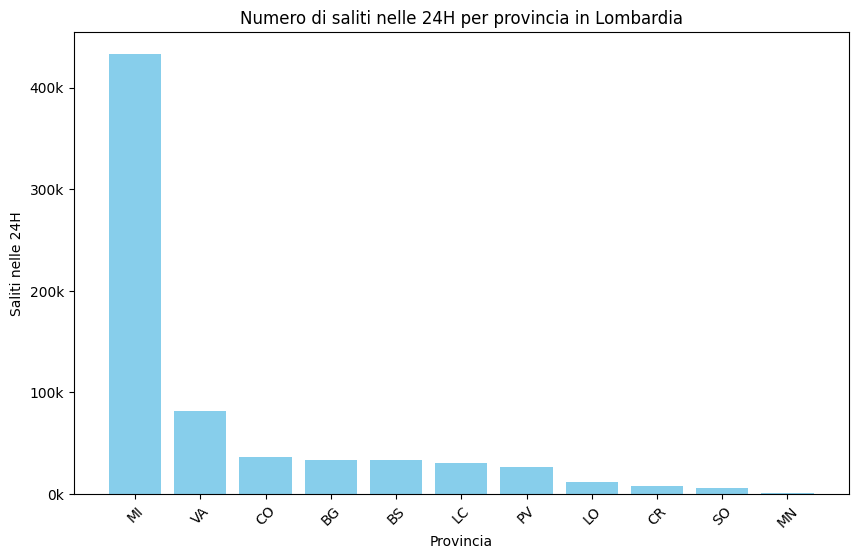

In [33]:
grouped_data_lo_sorted = grouped_data_lo.sort_values(by='Saliti24H', ascending=False)

print(grouped_data_lo_sorted)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grouped_data_lo_sorted['Prov'], grouped_data_lo_sorted['Saliti24H'], color='skyblue')
plt.xlabel('Provincia')
plt.ylabel('Saliti nelle 24H')
plt.title('Numero di saliti nelle 24H per provincia in Lombardia')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
plt.show()


In [34]:
grouped_data_lo_province = data_lo.groupby('Prov')[['Saliti24H', 'Discesi7-9']].sum().reset_index()

grouped_data_lo_province['Saliti_per_ora'] = grouped_data_lo_province['Saliti24H'] / 24
grouped_data_lo_province['Discesi_per_ora'] = grouped_data_lo_province['Discesi7-9'] / 3  

grouped_data_lo_province_day_type = data_lo.groupby(['Prov', 'Tipo giorno'])[['Saliti24H', 'Discesi7-9']].sum().reset_index()

grouped_data_lo_province_day_type['Saliti_per_ora'] = grouped_data_lo_province_day_type['Saliti24H'] / 24
grouped_data_lo_province_day_type['Discesi_per_ora'] = grouped_data_lo_province_day_type['Discesi7-9'] / 3 

print(grouped_data_lo_province_day_type)

   Prov Tipo giorno  Saliti24H  Discesi7-9  Saliti_per_ora  Discesi_per_ora
0    BG     Feriale      33780        6090     1407.500000      2030.000000
1    BS     Feriale      33350        6020     1389.583333      2006.666667
2    CO     Feriale      36740        5940     1530.833333      1980.000000
3    CR     Feriale       7830        1640      326.250000       546.666667
4    LC     Feriale      30800        5290     1283.333333      1763.333333
5    LO     Feriale      11890        2000      495.416667       666.666667
6    MI     Feriale     432990      114240    18041.250000     38080.000000
7    MN     Feriale       1000         140       41.666667        46.666667
8    PV     Feriale      26420        5090     1100.833333      1696.666667
9    SO     Feriale       5930        1660      247.083333       553.333333
10   VA     Feriale      81750       15000     3406.250000      5000.000000


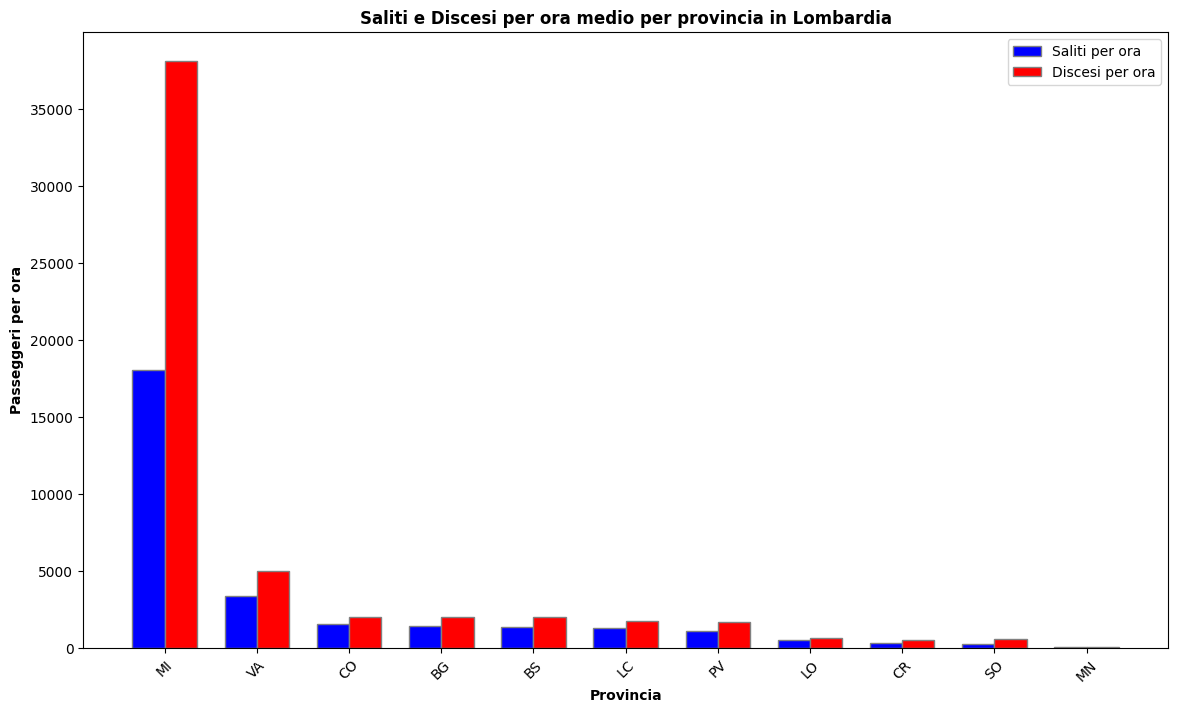

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

grouped_data_lo_province_sorted = grouped_data_lo_province.sort_values(by='Saliti_per_ora', ascending=False)

bar_width = 0.35

r1 = np.arange(len(grouped_data_lo_province_sorted))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(14, 8))
plt.bar(r1, grouped_data_lo_province_sorted['Saliti_per_ora'], color='b', width=bar_width, edgecolor='grey', label='Saliti per ora')
plt.bar(r2, grouped_data_lo_province_sorted['Discesi_per_ora'], color='r', width=bar_width, edgecolor='grey', label='Discesi per ora')

plt.xlabel('Provincia', fontweight='bold')
plt.ylabel('Passeggeri per ora', fontweight='bold')
plt.title('Saliti e Discesi per ora medio per provincia in Lombardia', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(grouped_data_lo_province_sorted))], grouped_data_lo_province_sorted['Prov'], rotation=45)

plt.legend()
plt.show()

## Linea con più passeggeri

In [36]:
linea_con_piu_passeggeri = data_lombardia.groupby('Linea fisica')['Saliti24H'].sum().reset_index()
linea_con_piu_passeggeri_sorted = linea_con_piu_passeggeri.sort_values(by='Saliti24H', ascending=False)

print(linea_con_piu_passeggeri_sorted.head(1))

                 Linea fisica  Saliti24H
25  Milano Nord Cadorna - Sar      96030
